
## Table of  Contents
1. [Initializations and Installations](#1)
1. [Generating Masks from JSON annotations](#2)
1. [Data Partitioning](#3)
  1. [10-Fold Split](#31)
  1. [Train/Test Split](#32)
1. [Module Integration: Importing Trainer and Evaluator Classes](#4)
1. [Model Training](#5)
  1. [Model Training for 10-Fold Split](#51)
  1. [Model Training for train/test Split Data](#52)
1. [Model Evaluation](#6)
1. [Loading and Analyzing Model Training Scores](#7)
  1. [Loading Logged Scores](#71)
  1. [Visualization: Performance Curves](#72)
1. [Model Output: Masked Cartridge Case Image](#8)


 # <a id='1'>1. Initializations and Installations</a>  

In [ ]:
from google.colab import drive
import os, cv2, json
from os import getcwd
import numpy as np
import typing as T
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import math
import torch

# Install Pytorch library
!pip install segmentation-models-pytorch

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Define the folder path
folder_path = "/content/drive/MyDrive/Your_Folder_Name"

# List files in the folder
# files = os.listdir(folder_path)
# print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to a specific path
os.chdir(folder_path)
# Print the updated working directory
print("Updated Working Directory:", os.getcwd())

In [ ]:
# Define directories
dataset_path = os.path.join(os.getcwd(), 'dataset')
images_path = os.path.join(dataset_path, 'images')
masks_path = os.path.join(dataset_path, 'masks')
model_path = os.path.join(os.getcwd(), 'training/dump')
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
out_dir  = os.path.join(os.getcwd(), 'training')

print(f"Dataset Path: {dataset_path}\n"
      f"Images Path: {images_path}\n"
      f"Masks Path: {masks_path}\n"
      f"Model Path: {model_path}\n"
      f"Train Path: {train_path}\n"
      f"Test Path: {test_path}\n"
      f"Output Directory: {out_dir}")

In [ ]:
class_names = ["FP","FPD","ASH","bf"]

 # <a id='2'>2. Generating Masks from JSON annotations</a>   
### The following code was used to convert the annotation .json files to masks. It is not required to run this section since the folders have already been generated.


In [ ]:
# def generate_annos(annos: T.Dict, class_names = ["FP","FPD","ASH","bf1","bf2"]):
#     """
#     Generate a final mask from annotation shapes.

#     Args:
#     - annos (Dict): Dictionary containing image annotations, including 'imageHeight', 'imageWidth',
#                     and 'shapes' (a list of shape annotations).
#     - class_names (List): List of class names corresponding to the annotation labels.

#     Returns:
#     - np.ndarray: Final mask where each pixel is assigned a class index.

#     Example:
#     >>> annos = {
#     ...     'imageHeight': 256,
#     ...     'imageWidth': 256,
#     ...     'shapes': [
#     ...         {'label': 'FP', 'points': [(10, 10), (20, 20), (30, 30)]},
#     ...         {'label': 'FPD', 'points': [(40, 40), (50, 50), (60, 60)]},
#     ...         # ... more shape annotations ...
#     ...     ]
#     ... }
#     >>> class_names = ["FP", "FPD", "ASH", "bf1", "bf2"]
#     >>> final_mask = generate_annos(annos, class_names)
#     """
#     final_mask = np.zeros((annos['imageHeight'], annos['imageWidth']), np.uint8)
#     gt_dict = {}
#     for anno in annos['shapes']:
#         image = Image.new("L", (annos['imageWidth'], annos['imageHeight']))
#         mask = ImageDraw.Draw(image)
#         intensity = 1

#         xy = [(int(x), int(y)) for x,y in anno['points']]
#         mask.polygon(xy, fill=intensity, outline=intensity, width=1)
#         gt_dict[anno['label']] = np.array(image, np.uint8)
#         if anno['label'] in ["FP","FPD","ASH"]:
#             final_mask[np.array(image, np.uint8) == 1] = class_names.index(anno['label']) + 1

#     if "bf1" in gt_dict.keys():
#         bf_mask = abs(gt_dict["bf1"] - gt_dict["bf2"])
#         final_mask[bf_mask == 1] = 4

#     return final_mask


In [ ]:
# # src is a directory, which containes the original Fadul images downloded for this project
# src = os.path.join(os.getcwd(), "Data")

# # Create mask from json file
# # The annotation is done using Labelme tool. The annotated image is saved in .json file.
# for name in [x for x in os.listdir(src) if x.endswith('.json')]:
#     with open(os.path.join(src, name), 'r') as f:
#         annos = json.load(f)

#     mask = generate_annos(annos)
#     # plt.imshow(mask)
#     # plt.show()
#     cv2.imwrite(os.path.join(masks_path, f"{name.replace('.json','')}_mask.png"), mask)


In [ ]:
# for name in [x for x in os.listdir(src) if x.endswith('.PNG')]:
#     img = cv2.imread(os.path.join(src, name),cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img, cmap='gray')
#     plt.show()
#     cv2.imwrite(os.path.join(images_path, f"{name.replace('.PNG','')}.png"), img)

# <a id='3'>3. Data Partitioning</a>  

 ### <a id='31'>3.1. 10-Fold Split</a>  
### The following code was used to generate folders for 10-fold cross validation. It is not required to run this section since the folders have already been generated and saved here:
- /content/drive/MyDrive/Your_Folder_Name/dataset.



In [ ]:
# import os
# import shutil
# from sklearn.model_selection import KFold

# # List and sort files in the images subfolder
# image_files = sorted([i for i in os.listdir(images_path) if i.endswith('.png')])
# # List and sort files in the masks subfolder
# mask_files = sorted([i for i in os.listdir(masks_path) if i.endswith('.png')])

# k = 10

# # Create output folders for each fold
# for fold in range(1, k+1):
#     fold_folder = os.path.join(dataset_path, f'fold{fold}')
#     os.makedirs(os.path.join(fold_folder, 'train', 'images'), exist_ok=True)
#     os.makedirs(os.path.join(fold_folder, 'train', 'masks'), exist_ok=True)
#     os.makedirs(os.path.join(fold_folder, 'test', 'images'), exist_ok=True)
#     os.makedirs(os.path.join(fold_folder, 'test', 'masks'), exist_ok=True)

# # Perform 10-fold cross-validation
# kf = KFold(n_splits = k, shuffle=True, random_state=42)

# for fold, (train_index, test_index) in enumerate(kf.split(image_files)):
#     fold_folder = os.path.join(dataset_path, f'fold{fold + 1}')

#     # Copy training images and masks
#     for idx in train_index:
#         image_name = image_files[idx]
#         mask_name = mask_files[idx]

#         shutil.copy(os.path.join(images_path, image_name), os.path.join(fold_folder, 'train', 'images', image_name))
#         shutil.copy(os.path.join(masks_path, mask_name), os.path.join(fold_folder, 'train', 'masks', mask_name))

#     # Copy testing images and masks
#     for idx in test_index:
#         image_name = image_files[idx]
#         mask_name = mask_files[idx]

#         shutil.copy(os.path.join(images_path, image_name), os.path.join(fold_folder, 'test', 'images', image_name))
#         shutil.copy(os.path.join(masks_path, mask_name), os.path.join(fold_folder, 'test', 'masks', mask_name))


 ### <a id='32'>3.2. Train/Test Split</a>  
### The following code was used to generate train and test folders. It is not required to run this section since the folders have already been generated and are available here:
- /content/drive/MyDrive/Your_Folder_Name/dataset/train
- /content/drive/MyDrive/Your_Folder_Name/dataset/test




In [ ]:
# import random
# from sklearn.model_selection import train_test_split
# import shutil


# # List and sort files in the images subfolder
# image_files = sorted([i for i in os.listdir(images_path) if i.endswith('.png')])
# # List and sort files in the masks subfolder
# mask_files = sorted([i for i in os.listdir(masks_path) if i.endswith('.png')])


# # # Create folders for train and test sets
# # train_folder = 'dataset/train'
# # test_folder = 'dataset/test'


# # Split data into train and test sets
# images_train, images_test, masks_train, masks_test = train_test_split(image_files, mask_files, test_size=0.1, random_state=42)



# os.makedirs(train_path, exist_ok=True)
# os.makedirs(os.path.join(train_path,'images'), exist_ok=True)
# os.makedirs(os.path.join(train_path,'masks'), exist_ok=True)

# os.makedirs(test_path, exist_ok=True)
# os.makedirs(os.path.join(test_path,'images'), exist_ok=True)
# os.makedirs(os.path.join(test_path,'masks'), exist_ok=True)

# # Move train images and masks
# for image in images_train:
#     shutil.move(os.path.join(images_path, image), os.path.join(train_path, 'images', image))
#     corresponding_mask = image.replace('.png', '_mask.png')
#     shutil.move(os.path.join(masks_path, corresponding_mask), os.path.join(train_path, 'masks', corresponding_mask))

# # Move test images and masks
# for image in images_test:
#     shutil.move(os.path.join(images_path, image), os.path.join(test_path, 'images', image))
#     corresponding_mask = image.replace('.png', '_mask.png')
#     shutil.move(os.path.join(masks_path, corresponding_mask), os.path.join(test_path, 'masks', corresponding_mask))


# <a id='4'>4.Module Integration: Importing Trainer and Evaluator Classes</a>  
Import the Trainer and Evaluator classes from the 'utils' module. This module is available here:
- /content/drive/MyDrive/Your_Folder_Name



In [ ]:
from utils import Trainer, Evaluator

 # <a id='5'>5. Model Training</a>  

## <a id='51'>5.1. Model Training for 10-Fold Split</a>  
Exclusively for reporting the model's performance, cross-validation is employed. The model undergoes training and validation in ten iterations, where each fold is utilized as the validation set precisely once. This approach ensures a robust assessment of the model's performance on previously unseen data.

The trained models for each fold, along with their corresponding logged scores, can be accessed at the following location: /content/drive/MyDrive/Your_Folder_Name/training

For more clarification, consider the following example to understand which directories are used. For simplicity, consider fold1:

- The dataset for fold1 is available here: /content/drive/MyDrive/Your_Folder_Name/dataset/fold1. This folder contains both the train and test datasets.
- The trained model for fold1 is saved here: /content/drive/MyDrive/Your_Folder_Name/training/fold1/dump/run_0/training_checkpoint.pth.
- The scores for the saved model can be assessed here: /content/drive/MyDrive/Your_Folder_Name/training/fold1/dump/run_0/training_dice_score.json.

# * If you want to run this section, uncomment the following code cell.


In [ ]:
# for fold in range(1, 11):
#   root_dir = os.path.join(dataset_path, f'fold{fold}')
#   out_dir  = os.path.join(os.getcwd(), 'training', f'fold{fold}')

#   # Creating an instance of the Trainer class with specified parameters
#   trainer = Trainer(
#       dataset_dir = root_dir,        # Path to the dataset
#       out_dir = out_dir,             # Output directory for storing trained models and results
#       classes = class_names,         # List of class names (e.g., class_names = ["FP","FPD","ASH","bf"])
#       patience = 10,                 # Patience for early stopping during training (Set to 10 for 10-fold cross-validation, considering the early stopping approach)
#       num_epochs = 100,              # Number of training epochs
#       encoder = "efficientnet-b0",   # Encoder architecture (e.g., "efficientnet-b0")
#       decoder = 'Unet',              # Decoder architecture (e.g., 'Unet')
#       optimizer = 'Adam',            # Optimizer choice (e.g., 'Adam')
#       train_bs = 3,                  # Batch size for training
#       init_lr = 0.001,               # Initial learning rate
#       device = 'cpu'                 # Device for training (e.g., 'cpu' or 'cuda')
#   )
#   trainer.train()

##<a id='52'>5.2. Model Training for Train/Test Split Data</a>
The best-trained model in terms of Dice Score and its corresponding logged scores for each epoch are saved at the following location: /content/drive/MyDrive/Your_Folder_Name/training/dump

For more clarification, consider the following example to understand which directories are used:
  - The dataset is available here: /content/drive/MyDrive/Your_Folder_Name/dataset. This folder contains both the train and test datasets.
  - The trained model is saved here: /content/drive/MyDrive/Your_Folder_Name/training/dump/run_0/training_checkpoint.pth.



## For the project, the trained models and their logged scores are available as follows:
  - For early stopping: /content/drive/MyDrive/Your_Folder_Name/training/dump/trained_EarlyStop
  - For 100 Epoch: /content/drive/MyDrive/Your_Folder_Name/training/dump/trained_100Epoch

# * If you want to run this section, uncomment the following code cells.


In [ ]:
# # Creating an instance of the Trainer class with specified parameters
# trainer = Trainer(
#     dataset_dir = dataset_path,    # Path to the dataset
#     out_dir = out_dir,             # Output directory for storing trained models and results
#     classes = class_names,         # List of class names (e.g., class_names = ["FP","FPD","ASH","bf"])
#     patience = 10,                 # Patience for early stopping during training (As explained in the report, for the first strategy patience is 10, and for the second strategy patience is set to 100).
#     num_epochs = 100,              # Number of training epochs
#     encoder = "efficientnet-b0",   # Encoder architecture (e.g., "efficientnet-b0")
#     decoder = 'Unet',              # Decoder architecture (e.g., 'Unet')
#     optimizer = 'Adam',            # Optimizer choice (e.g., 'Adam')
#     train_bs = 3,                  # Batch size for training
#     init_lr = 0.001,               # Initial learning rate
#     device = 'cpu'                 # Device for training (e.g., 'cpu' or 'cuda')
# )


In [ ]:
# trainer.train()

 # <a id='6'>6. Model Evaluation</a>  

Evaluator class is designed for evaluating a segmentation model on a given dataset.

####  * Choose one of the following trained models for evaluation or call your trained model.

In [ ]:
# Uncomment the following line to evaluate the saved trained model for early stopping training:
selected_model_dir = os.path.join(model_path, 'trained_EarlyStop')

# Uncomment the following line to evaluate the saved trained model for 100 Epoch training:
# selected_model_dir = os.path.join(model_path, 'trained_100Epoch')


In [ ]:
# Creating an instance of the Evaluator class with specified parameters
evaluater = Evaluator(
    model_dir = selected_model_dir,       # Directory containing the trained model for evaluation
    classes   = class_names,              # List of class names expected by the model (e.g., class_names = ["FP","FPD","ASH","bf"])
    encoder   = 'efficientnet-b0',        # Encoder architecture used in the trained model (e.g., "efficientnet-b0")
    decoder   = 'Unet',                   # Decoder architecture used in the trained model (e.g., 'Unet')
    ckpt_name = 'training_checkpoint.pth',# Name of the checkpoint file with saved model weights
    device    = 'cuda'                    # Device for evaluation (e.g., 'cpu' or 'cuda')
)


The evaluate method is invoked on the evaluater instance with specified parameters. If the visualize parameter is set to True, this method saves the masked image using the trained model. The results are stored in the following directory:
- /content/drive/MyDrive/Your_Folder_Name/dataset/dataset_name/preds/image_name
  (Assuming dataset_name and image_name are placeholders for the actual names of the dataset and the image being evaluated).

('Fadul 6-1 3DVM.png',)


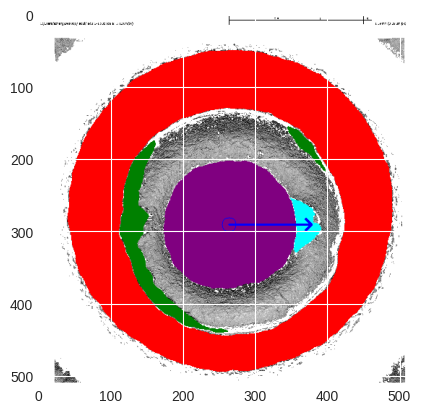

('Fadul 5-2 3DVM.png',)


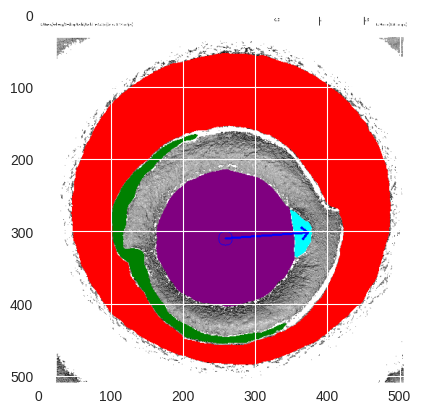

('Fadul 5-1 3DVM.png',)


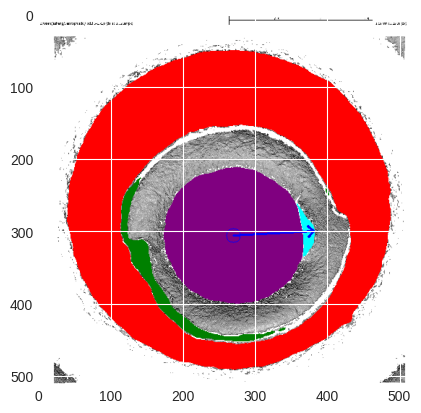

('Fadul S 3DVM.png',)


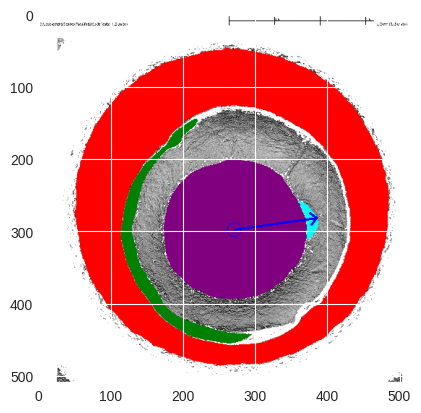

In [ ]:
evaluater.evaluate(
    dataset_dir = dataset_path,    # Path to the dataset directory
    dataset_name = 'test',         # Name of the dataset (e.g., 'test' indicating the test set)
    conf = 0.5,                    # Confidence threshold for prediction
    visualize = True               # Flag indicating whether to visualize the evaluation.
)

# <a id='7'>7. Analyzing Model Performance</a>  

## <a id='7'>7.1. Loading Logged Scores</a>  

In [ ]:
def read_score_data(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

training_ds_val_dir = os.path.join(selected_model_dir, 'training_dice_score_val.json')
training_ds_c_val_dir = os.path.join(selected_model_dir, 'training_dice_score_ind_c_val.json')
training_ds_test_dir = os.path.join(selected_model_dir, 'training_dice_score_test.json')
training_ds_c_test_dir = os.path.join(selected_model_dir, 'training_dice_score_ind_c_test.json')
training_train_loss_dir = os.path.join(selected_model_dir, 'training_train_loss.json')

score_data_val = read_score_data(training_ds_val_dir)
score_data_val_c = read_score_data(training_ds_c_val_dir)
score_data_test = read_score_data(training_ds_test_dir)
score_data_test_c = read_score_data(training_ds_c_test_dir)
training_loss= read_score_data(training_train_loss_dir)

In [ ]:
score_val_dict = {class_name: [] for class_name in class_names}
score_test_dict = {class_name: [] for class_name in class_names}

for class_name in class_names:
    score_val_dict[class_name] = [row[class_name] for row in score_data_val_c]
    score_test_dict[class_name] = [row[class_name] for row in score_data_test_c]

### Uncomment the following code cell, if you want to check the cross validation result, which is presented in the report

In [ ]:
# import torch
# dice_score = []
# for fold in range(1, 2):
#   ckpt_path  = os.path.join(os.getcwd(), 'training', f'fold{fold}/dump/run_1/training_checkpoint.pth')
#   ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
#   dice_score.append(float(ckpt['DICE_score_test']))
#   # dice_score.append(round(float(ckpt['DICE_score_test']), 2))
#   print(f'Fold{fold}:', round(float(ckpt['DICE_score_test']), 4))


# dice_score_avg = round(np.mean(dice_score),4)
# dice_score_std = np.std(dice_score)
# print(f"dice_score_avg: {dice_score_avg}\ndice_score_avg: {dice_score_std}")

## <a id='7'>7.2. Visualization: Performance Curves</a>   


In [ ]:
def performance_curve_subplot(dice_scores_dict):
    """
    Create a 2 by 2 subplot to visualize improvement curves of Dice Scores for different classes.

    Args:
    - dice_scores_dict (dict): A dictionary where keys are class names, and values are lists of Dice Scores across epochs.

    Returns:
    - None

    Example:
    >>> dice_scores_dict = {'Class1': [0.5, 0.6, 0.7, 0.8], 'Class2': [0.4, 0.5, 0.6, 0.7]}
    >>> performance_curve_subplot(dice_scores_dict)
    """
    # Create a 2 by 2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Set the style
    plt.style.use('seaborn-darkgrid')

    for i, (mask_name, dice_scores) in enumerate(dice_scores_dict.items()):
        row = math.floor(i / 2)
        col = i % 2

        color = ['r', 'g', 'm', 'c']

        # Plotting with more details
        axs[row, col].plot(range(1, len(dice_scores) + 1), dice_scores, marker='o', linestyle='-', color=color[i], label='Dice Score')
        axs[row, col].set_title(f'Improvement of Dice Score for {mask_name} Class', fontsize=12)
        axs[row, col].set_xlabel('Epoch', fontsize=10)
        axs[row, col].set_ylabel('Dice Score', fontsize=10)
        axs[row, col].tick_params(labelsize=8)
        axs[row, col].legend(fontsize=8)
        axs[row, col].grid(True)

        # Highlight the best score
        best_epoch = range(1, len(dice_scores) + 1)[dice_scores.index(max(dice_scores))]
        best_score = max(dice_scores)
        axs[row, col].annotate(f'Epoch = {best_epoch}\nBest Avg. Score:{best_score:.2f}',
                              xy=(best_epoch, best_score),
                              xytext=(best_epoch - 15, best_score - 0.2),
                              arrowprops=dict(facecolor='k', shrink=0.05),
                              fontsize=8,
                              color='red')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()



def performance_curve(dice_scores, dice_scores_val_dict, name='name'):
    """
    Plot the improvement of Dice score in each epoch for a given class.

    Args:
    - dice_scores (list): List of Dice Scores across epochs.
    - dice_scores_val_dict (dict): A dictionary where keys are class names, and values are tuples containing
                                   lists of Dice Scores and corresponding epochs.
    - name (str): Name of the class for which the performance curve is plotted.

    Returns:
    - None

    Example:
    >>> dice_scores = [0.5, 0.6, 0.7, 0.8]
    >>> dice_scores_val_dict = {'Class1': ([0.4, 0.5, 0.6, 0.7], [1, 2, 3, 4]), 'Class2': ([0.3, 0.4, 0.5, 0.6], [1, 2, 3, 4])}
    >>> performance_curve(dice_scores, dice_scores_val_dict, name='Class1')
    """
    # Plot the improvement of Dice score in each epoch
    epochs = range(1, len(dice_scores) + 1)

    # Set the style
    plt.style.use('seaborn-darkgrid')

    # Plotting with more details
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, dice_scores, marker='o', linestyle='-', color='b', label='Dice Score')
    plt.title(f'Improvement of Dice Score in Each Epoch for {name}', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Avg. Dice Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Highlight the best score
    best_epoch = epochs[dice_scores.index(max(dice_scores))]
    best_score = max(dice_scores)

    classes_best_epoch = {key: (values[0], values[1]) if isinstance(values, tuple) else (values, 0) for key, values in dice_scores_val_dict.items()}

    plt.annotate(f'Epoch = {best_epoch}\nBest Avg. Score:{best_score:.2f}',
                 xy=(best_epoch, best_score),
                 xytext=(best_epoch + 14, best_score - 0.5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=14,
                 color='red')
    temp = 0.5
    for class_name, class_score in classes_best_epoch.items():
        if isinstance(class_score[0], list):
            # Assuming you want to annotate the last value in the list
            xy = (best_epoch, class_score[0][-1])
        else:
            xy = (class_score[0], class_score[1])
        temp += 0.1

        plt.annotate(f'{class_name}: {xy[1]:.2f}',
                     xy=xy,
                     xytext=(best_epoch + 14, best_score - temp),  # Adjust the text position
                     fontsize=12,
                     color='k')

    # Show the plot
    plt.show()


def loss_curve(loss, dice_scores):
    """
    Plot the cross-entropy loss curve and highlight the epoch with the best Dice score.

    Args:
    - loss (list): List of cross-entropy loss values across epochs.
    - dice_scores (list): List of Dice Scores across epochs.
    - dice_scores_val_dict (dict): A dictionary where keys are class names, and values are tuples containing
                                   lists of Dice Scores and corresponding epochs.

    Returns:
    - None

    Example:
    >>> loss = [0.5, 0.4, 0.3, 0.2]
    >>> dice_scores = [0.6, 0.7, 0.8, 0.9]
    >>> dice_scores_val_dict = {'Class1': ([0.4, 0.5, 0.6, 0.7], [1, 2, 3, 4]), 'Class2': ([0.3, 0.4, 0.5, 0.6], [1, 2, 3, 4])}
    >>> loss_curve(loss, dice_scores, dice_scores_val_dict)
    """
    # Plot the improvement of Dice score in each epoch
    epochs = range(1, len(loss) + 1)

    # Set the style
    plt.style.use('seaborn-darkgrid')

    # Plotting with more details
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, marker='o', linestyle='-', color='b', label='Loss')
    plt.title(f'Cross Entropy Loss Score in Each Epoch', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Cross Entropy Loss', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Highlight the best score
    best_epoch = epochs[dice_scores.index(max(dice_scores))]
    best_score = max(dice_scores)

    classes_best_epoch = {key: (values[0], values[1]) if isinstance(values, tuple) else (values, 0) for key, values in dice_scores_val_dict.items()}

    plt.annotate(f'Epoch = {best_epoch}\nBest Avg. Score: {dice_scores[best_epoch]:.2f}\nLoss:{loss[best_epoch]:.2f}',
                 xy=(best_epoch, loss[best_epoch]),
                 xytext=(best_epoch +14, loss[best_epoch] +0.3),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=14,
                 color='red')

    # Show the plot
    plt.show()

In [ ]:
# Performance Curve Val
dice_scores_val_dict = {
    'Breach Face (BF)': score_val_dict['bf'],
    'Aperture Shear (ASH)': score_val_dict['ASH'],
    'Firing Pin (FP)': score_val_dict['FP'],
    'Firing Pin Drag (FPD)': score_val_dict['FPD']
}

# performance_curve_subplot(dice_scores_val_dict)

In [ ]:
# # Performance Curve test
dice_scores_test_dict = {
    'Breach Face (BF)': score_test_dict['bf'],
    'Aperture Shear (ASH)': score_test_dict['ASH'],
    'Firing Pin (FP)': score_test_dict['FP'],
    'Firing Pin Drag (FPD)': score_test_dict['FPD']
}

# performance_curve_subplot(dice_scores_test_dict)

<ipython-input-49-8d29b317aa02>:76: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


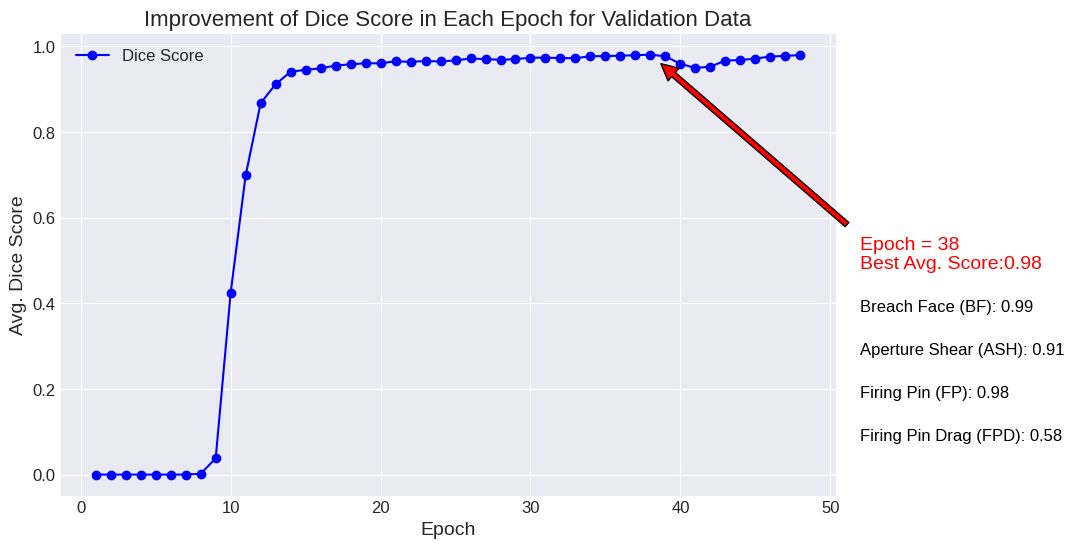

In [ ]:
# Validation Data
performance_curve(score_data_val, dice_scores_val_dict, name='Validation Data')

<ipython-input-49-8d29b317aa02>:76: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


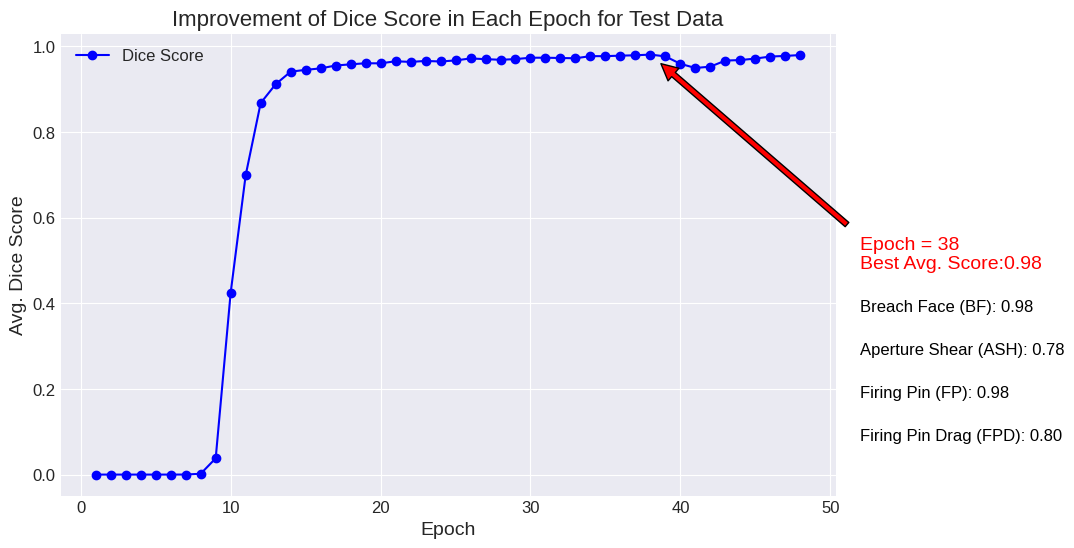

In [ ]:
# # Test Data
performance_curve(score_data_val, dice_scores_test_dict, name='Test Data')

<ipython-input-49-8d29b317aa02>:143: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


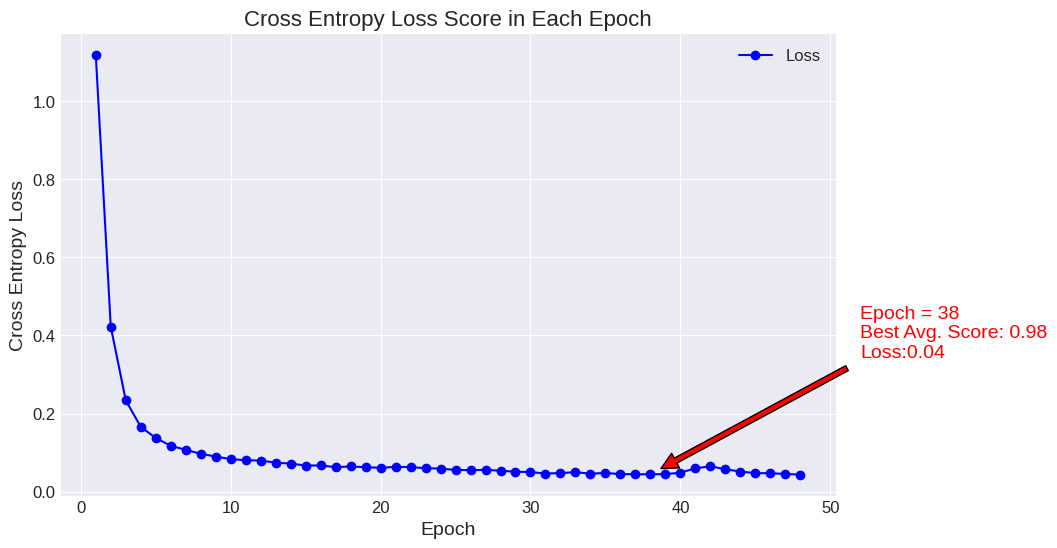

In [ ]:
# # Loss Curve
loss_curve(training_loss,score_data_val)

# <a id='8'>8. Model Output: Masked Cartride Case Image</a>    

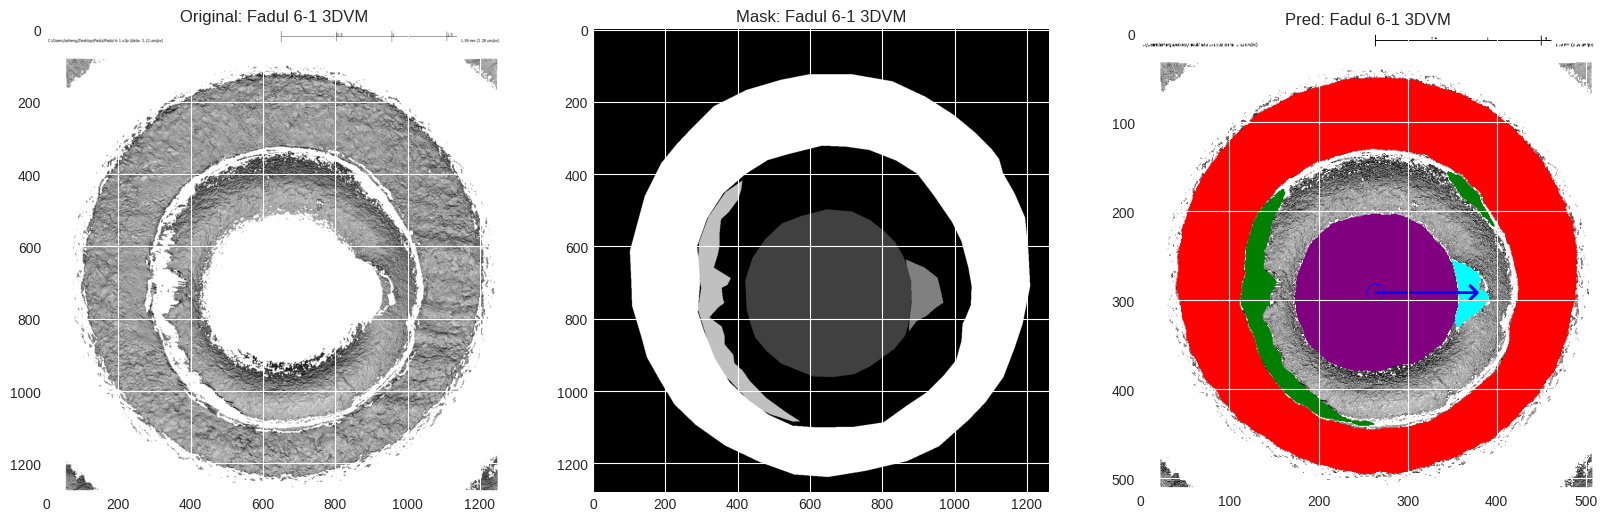

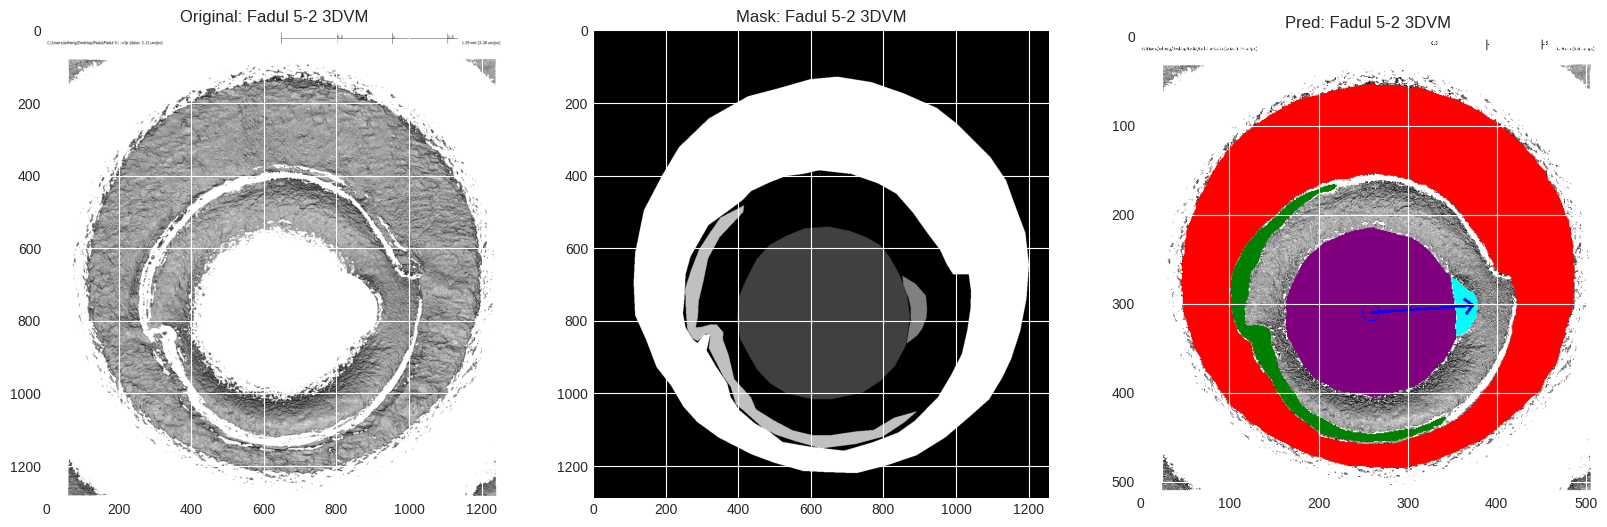

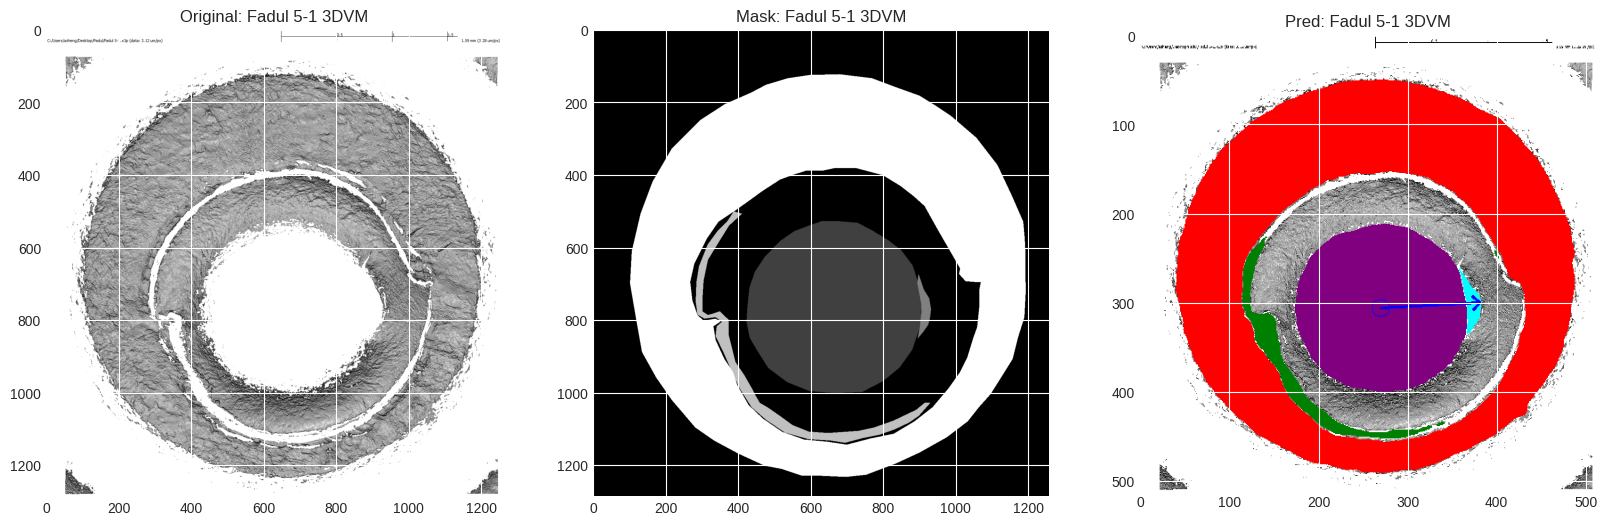

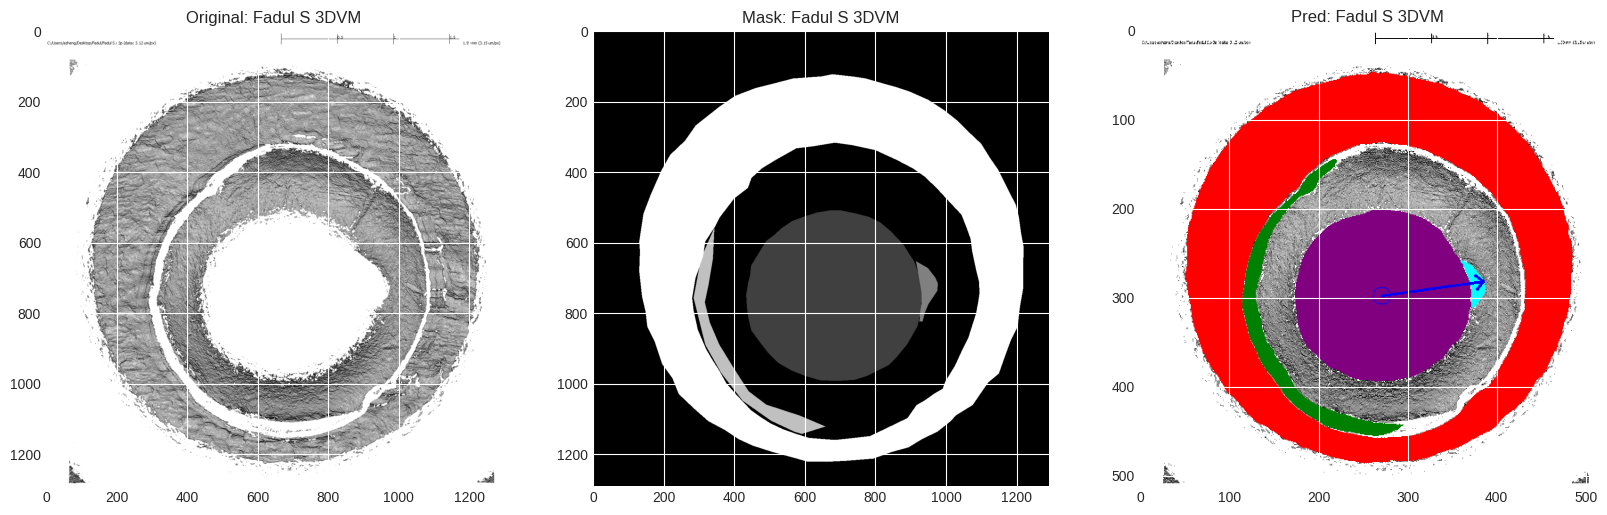

In [ ]:
img_gt_path = os.path.join(test_path,"images")
mask_gt_path = os.path.join(test_path,"masks")
mask_pred_path = os.path.join(test_path,"pred",selected_model_dir.split("/dump/")[1])

for name in [x for x in os.listdir(img_gt_path) if x.endswith('.png')]:

  name = name.split('.png')[0]
  # Load the image
  img = cv2.imread(os.path.join(img_gt_path, name + ".png"), cv2.IMREAD_GRAYSCALE)
  # Load the ground truth mask
  mask_img = cv2.imread(os.path.join(mask_gt_path, name + "_mask.png"), cv2.IMREAD_GRAYSCALE)
  # Load the pred image
  pred_img = mpimg.imread(os.path.join(mask_pred_path, name + ".png"))


  # print(os.path.join(img_gt_path, name + ".png"))
  # Create a new figure with two subplots
  fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 15))

  # Display the original image
  ax1.imshow(img, cmap='gray')
  ax1.set_title('Original: ' + name)

  # Display the mask image
  ax2.imshow(mask_img, cmap='gray')  # Assuming mask images are grayscale
  ax2.set_title('Mask: ' + name)

  # Display the pred image
  ax3.imshow(pred_img)
  ax3.set_title('Pred: ' + name)

  plt.show()